In [22]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
import random
from PIL import Image
from PIL import ImageOps
import os
import pandas as pd
import cv2

pd.options.mode.chained_assignment = None
%matplotlib inline
np.random.seed(1234)
print('import successfully completed')

import successfully completed


In [23]:
testdata = pd.read_csv('traffic-sign/Test.csv')
traindata = pd.read_csv('traffic-sign/Train.csv')

fTrain, yTrain = traindata['Path'], traindata['ClassId']
fTest, yTest = testdata['Path'], testdata['ClassId']

print(fTrain.shape)
print(fTest.shape)

(39209,)
(12630,)


In [24]:
def init(img):
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img
print('methods declaration section 2')

methods declaration section 2


In [25]:
data=[]
labels=[]

for i in range(fTrain.size) :
    image = cv2.imread('traffic-sign/' + fTrain[i])
    inited = init(image)
    # image_from_array = Image.fromarray(gray, '1')
    # size_image = image_from_array.resize((32, 32))    
    data.append(np.array(inited))
    labels.append(i)

Cells=np.array(data)
labels=np.array(labels)

s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]
print(Cells.shape)

(39209, 32, 32)


In [26]:
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
# X_train = X_train.astype('float32')/255 
# X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)

(31368, 32, 32)
(7841, 32, 32)
(31368,)


In [27]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train[0].shape == (32,32)), "The dimensions of the images are not 32 x 32 x 3."
print('assertion true') 

assertion true


(-0.5, 31.5, 31.5, -0.5)

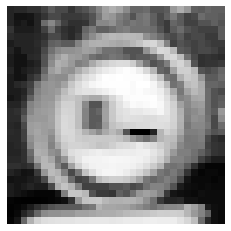

In [29]:
plt.imshow(X_train [9009], cmap="gray")
plt.axis('off')



In [30]:
testdata=[]
testlabels=[]

for i in range(fTest.size) :
    image = cv2.imread('traffic-sign/' + fTest[i])
    inited = init(image)
    testdata.append(np.array(inited))
    testlabels.append(i)

y_test = np.array(testlabels)
X_test = np.array(testdata)

print(X_test.shape)
print(y_test.shape)

(12630, 32, 32)
(12630,)


In [34]:
assert(y_test.shape[0] == X_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test[0].shape == (32,32)), "The dimensions of the images are not 32 x 32 x 3."
print('assertion true')

assertion true


(-0.5, 31.5, 31.5, -0.5)

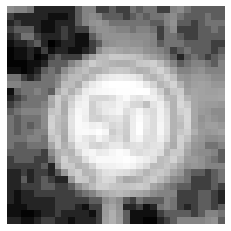

In [35]:
# xTest = []
# for i in range(X_test.size):
#     yTrain.apped(init(y_test[i]))
plt.imshow(X_test [67], cmap="gray")
plt.axis('off')
